In [ ]:
import torch

if torch.cuda.is_available():
  device = "cuda"
else:
  device = "cpu"

print(device)

cpu


In [ ]:
import torch
print(torch.cuda.is_available())


False


# import

## down

In [ ]:
from google.colab import drive
drive.mount("/content/myDrive")

Mounted at /content/myDrive


In [ ]:
import pandas as pd

df_tags = pd.read_csv("/content/myDrive/MyDrive/life/EXplore/мероприятия/Марафон \"Цифровой Петербург\"/FuzzySearch/данные/ds/1_dstags_easy.csv", header=None).fillna(0).astype(int)
df_words = pd.read_csv("/content/myDrive/MyDrive/life/EXplore/мероприятия/Марафон \"Цифровой Петербург\"/FuzzySearch/данные/ds/1_dswords_easy.csv", header=None).fillna(0).astype(str)

df_words = df_words.drop(index=0)
df_words = df_words.drop(df_words.columns[0], axis=1)

df_tags = df_tags.drop(index=0)
df_tags = df_tags.drop(df_tags.columns[0], axis=1)


In [ ]:
df_words.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1,город,СПб,",",лит,Б,0,Маяковского,ул,",",помещ,583,",",дом,122,",",0,0,0,0
2,лит,Б,0,кв,201,",",Пушкина,переулок,",",г,санкт петербург,",",0,0,0,0,0,0,0
3,корпус,6,",",квартира,392,",",город,СПБ,",",Гоголя,пер,",",0,0,0,0,0,0,0
4,квартира,374,",",к,.,1,",",лит,А,0,прскт,Ленина,",",0,0,0,0,0,0
5,корп,1,",",Невский,переулок,",",помещ,239,",",г,санкт петербург,",",0,0,0,0,0,0,0


In [ ]:
df_tags.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1,0,0,0,7,8,0,1,2,0,9,10,0,3,4,0,0,0,0,0
2,7,8,0,9,10,0,1,2,0,0,0,0,0,0,0,0,0,0,0
3,5,6,0,9,10,0,0,0,0,1,2,0,0,0,0,0,0,0,0
4,9,10,0,5,0,6,0,7,8,0,1,2,0,0,0,0,0,0,0
5,5,6,0,1,2,0,9,10,0,0,0,0,0,0,0,0,0,0,0


## датасет

In [ ]:



data_final = []

for i in range(len(df_words)):
    tokens = df_words.iloc[i].dropna().tolist()
    tags = df_tags.iloc[i].dropna().tolist()

    data_final.append({
        "tokens": tokens,
        "ner_tags": tags
    })

print(data_final[:3])

[{'tokens': ['город ', 'СПб', ',', 'лит ', 'Б', '0', 'Маяковского', 'ул ', ',', 'помещ ', '583', ',', 'дом ', '122', ',', '0', '0', '0', '0'], 'ner_tags': [0, 0, 0, 7, 8, 0, 1, 2, 0, 9, 10, 0, 3, 4, 0, 0, 0, 0, 0]}, {'tokens': ['лит ', 'Б', '0', 'кв ', '201', ',', 'Пушкина', 'переулок ', ',', 'г ', 'санкт петербург', ',', '0', '0', '0', '0', '0', '0', '0'], 'ner_tags': [7, 8, 0, 9, 10, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}, {'tokens': ['корпус ', '6', ',', 'квартира ', '392', ',', 'город ', 'СПБ', ',', 'Гоголя', 'пер ', ',', '0', '0', '0', '0', '0', '0', '0'], 'ner_tags': [5, 6, 0, 9, 10, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0]}]


In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system =

In [ ]:
from datasets import Dataset

dataset = Dataset.from_list(data_final)




In [ ]:
print(dataset[0])

{'tokens': ['Санкт-Петербург', 'г', ',', 'ул', 'Полоцкая', ',', '15', 'к.', '2', ',', 'литера', 'А', ',', 'кв.', '87'], 'ner_tags': [0, 0, 0, 1, 2, 0, 3, 5, 6, 0, 7, 8, 0, 9, 10]}


In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("DeepPavlov/rubert-base-cased")
#tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-cased")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.65M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
def tokenize_and_align_labels(examples):
    tokenized_inputs = tokenizer(
        examples["tokens"],
        is_split_into_words=True,    # так как уже токены
        truncation=True,
        padding="max_length",
        max_length=128
    )

    labels = []
    for i, label in enumerate(examples["ner_tags"]):
        word_ids = tokenized_inputs.word_ids(batch_index=i)  # соответствие токенов словам
        label_ids = []
        previous_word_idx = None
        for word_idx in word_ids:
            if word_idx is None:
                label_ids.append(-100)  # паддинги игнорировать в loss'е
            elif word_idx != previous_word_idx:
                label_ids.append(label[word_idx])
            else:
                label_ids.append(label[word_idx])  # можно вставить I-метку, если хочешь
            previous_word_idx = word_idx
        labels.append(label_ids)

    tokenized_inputs["labels"] = labels
    return tokenized_inputs


In [ ]:
tokenized_dataset = dataset.map(tokenize_and_align_labels, batched=True)
print(tokenized_dataset)

Map:   0%|          | 0/100000 [00:00<?, ? examples/s]

Dataset({
    features: ['tokens', 'ner_tags', 'input_ids', 'token_type_ids', 'attention_mask', 'labels'],
    num_rows: 100000
})


# проверка датасета

In [ ]:
# Применяем функцию к данным
tokenized_data = tokenized_dataset[0]  # возьмем первый пример для проверки

# Проверяем ключи словаря
print(tokenized_data.keys())  # Должно вывести: dict_keys(['tokens', 'ner_tags', 'input_ids', 'token_type_ids', 'attention_mask', 'labels'])

dict_keys(['tokens', 'ner_tags', 'input_ids', 'token_type_ids', 'attention_mask', 'labels'])


In [ ]:
import pandas as pd

# Возьмем один элемент из tokenized_dataset
example = tokenized_dataset[200]

# Находим максимальную длину
max_len = max(len(example['tokens']),
              len(example['input_ids']),
              len(example['attention_mask']),
              len(example['token_type_ids']),
              len(example['labels']))

# Заполняем недостающие значения None (или другим значением по выбору)
def pad_list(lst, length, pad_value=None):
    return lst + [pad_value] * (length - len(lst))

# Заполняем все поля
tokens = pad_list(example['tokens'], max_len)
input_ids = pad_list(example['input_ids'], max_len)
attention_mask = pad_list(example['attention_mask'], max_len)
token_type_ids = pad_list(example['token_type_ids'], max_len)
labels = pad_list(example['labels'], max_len, pad_value=-100)  # Используем -100 для меток

# Создаем DataFrame
df = pd.DataFrame({
    'tokens': tokens,
    'input_ids': input_ids,
    'attention_mask': attention_mask,
    'token_type_ids': token_type_ids,
    'labels': labels
})


# Печатаем DataFrame
df.head(20)


,tokens,input_ids,attention_mask,token_type_ids,labels
0,корпус,101,1,0,-100
1,4,12163,1,0,5
2,",",144,1,0,6
3,проспект,128,1,0,0
4,Восстания,18812,1,0,1
5,",",90485,1,0,2
6,город,128,1,0,0
7,Санкт-Петербург,3106,1,0,0
8,",",9240,1,0,0
9,д,130,1,0,0


In [ ]:

ids = tokenized_dataset[200]['input_ids']
ids2tokens = tokenizer.convert_ids_to_tokens(tokenized_dataset[200]['input_ids'])
lbls = tokenized_dataset[200]['labels']


# Находим максимальную длину
max_len = max(len(ids),
              len(ids2tokens),
              len(lbls))

# Заполняем недостающие значения None (или другим значением по выбору)
def pad_list(lst, length, pad_value=None):
    return lst + [pad_value] * (length - len(lst))

# Заполняем все поля
ids2 = pad_list(ids, max_len)
ids2tokens2 = pad_list(ids2tokens, max_len)
lbls = pad_list(lbls, max_len)


# Создаем DataFrame
df_ids = pd.DataFrame({
    'ids2': ids2,
    'ids2tokens2': ids2tokens2,
    'lbls': lbls
})


# Печатаем DataFrame
df_ids

,ids2,ids2tokens2,lbls
0,101,[CLS],-100
1,12163,корпус,5
2,144,4,6
3,128,",",0
4,18812,проспект,1
...,...,...,...
123,0,[PAD],-100
124,0,[PAD],-100
125,0,[PAD],-100
126,0,[PAD],-100


In [ ]:
split_dataset = tokenized_dataset.train_test_split(test_size=0.2, seed=42)

train_dataset = split_dataset['train']
test_dataset = split_dataset['test']

# label2id

In [ ]:
label2id = {
    "O": 0,
    "B-улица": 1,
    "I-улица": 2,
    "B-дом": 3,
    "I-дом": 4,
    "B-корпус": 5,
    "I-корпус": 6,
    "B-литера": 7,
    "I-литера": 8,
    "B-квартира": 9,
    "I-квартира": 10,
}
id2label = {v: k for k, v in label2id.items()}

# model

In [ ]:
from transformers import AutoModelForTokenClassification

model = AutoModelForTokenClassification.from_pretrained(
    "DeepPavlov/rubert-base-cased",
    num_labels=len(label2id),
    id2label=id2label,
    label2id=label2id
).to(device)



Some weights of BertForTokenClassification were not initialized from the model checkpoint at DeepPavlov/rubert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
print(model)




BertForTokenClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-1

In [ ]:
# Замораживаем все веса базовой модели (BERT)
for param in model.base_model.parameters():
    param.requires_grad = False

for param in model.base_model.encoder.layer[11].parameters():
    param.requires_grad = True

for param in model.classifier.parameters():
    param.requires_grad = True


In [ ]:
for name, param in model.named_parameters():
    print(f"{name}: {'обучается' if param.requires_grad else 'заморожен'}")


bert.embeddings.word_embeddings.weight: заморожен
bert.embeddings.position_embeddings.weight: заморожен
bert.embeddings.token_type_embeddings.weight: заморожен
bert.embeddings.LayerNorm.weight: заморожен
bert.embeddings.LayerNorm.bias: заморожен
bert.encoder.layer.0.attention.self.query.weight: заморожен
bert.encoder.layer.0.attention.self.query.bias: заморожен
bert.encoder.layer.0.attention.self.key.weight: заморожен
bert.encoder.layer.0.attention.self.key.bias: заморожен
bert.encoder.layer.0.attention.self.value.weight: заморожен
bert.encoder.layer.0.attention.self.value.bias: заморожен
bert.encoder.layer.0.attention.output.dense.weight: заморожен
bert.encoder.layer.0.attention.output.dense.bias: заморожен
bert.encoder.layer.0.attention.output.LayerNorm.weight: заморожен
bert.encoder.layer.0.attention.output.LayerNorm.bias: заморожен
bert.encoder.layer.0.intermediate.dense.weight: заморожен
bert.encoder.layer.0.intermediate.dense.bias: заморожен
bert.encoder.layer.0.output.dense.weig

# Обучение

In [ ]:
import transformers
print(transformers.__version__)


4.51.3


In [ ]:
import os

os.environ["WANDB_DISABLED"] = "true"


In [ ]:
from transformers import TrainingArguments
from transformers import Trainer

training_args = TrainingArguments(
    output_dir="my_awesome_model",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    logging_steps=100,
    eval_steps=100,
    eval_strategy='steps',
    save_strategy='steps',
    load_best_model_at_end=True,
    report_to=None
)


def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(-1)
    accuracy = (predictions == labels).astype(float).mean()
    return {"accuracy": accuracy}





trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)


<ipython-input-46-b7fecc6d46c0>:30: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()

Step,Training Loss,Validation Loss


KeyboardInterrupt: 

In [ ]:
eval_results = trainer.evaluate(test_dataset)
print("Evaluation results:", eval_results)

Evaluation results: {'eval_loss': 0.0016236697556450963, 'eval_accuracy': 0.17270703125, 'eval_runtime': 13.9367, 'eval_samples_per_second': 143.506, 'eval_steps_per_second': 8.969, 'epoch': 2.0}


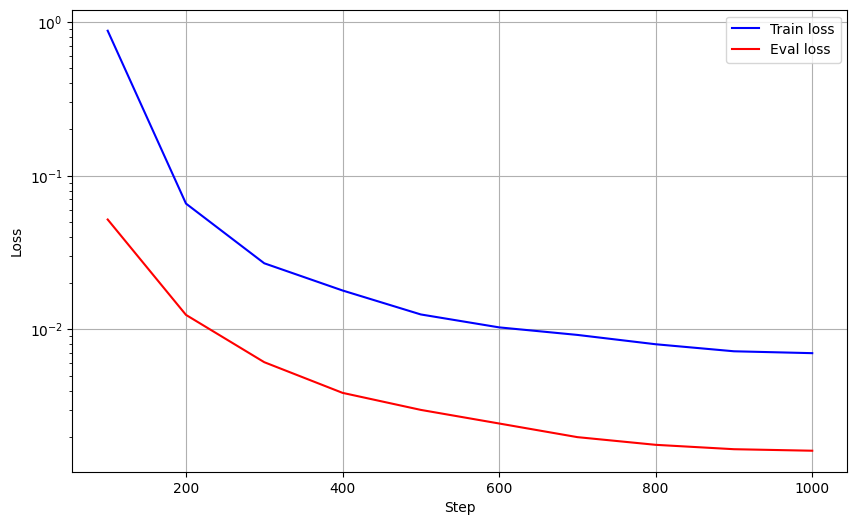

In [ ]:
train_logs = logs.dropna(subset=["loss"])  # Только тренировочные шаги
eval_logs = logs.dropna(subset=["eval_loss"])  # Только оценочные шаги

plt.figure(figsize=(10, 6))
plt.plot(train_logs["step"], train_logs["loss"], "b-", label="Train loss")
plt.plot(eval_logs["step"], eval_logs["eval_loss"], "r-", label="Eval loss")
plt.xlabel("Step")
plt.ylabel("Loss")
plt.yscale("log")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import pandas as pd

# Получаем логи и преобразуем в DataFrame
logs = pd.DataFrame(trainer.state.log_history)

# Выводим все строки без пропусков
pd.set_option('display.max_rows', None)  # Показать все строки
print(logs)

      loss  grad_norm  learning_rate  epoch  step  eval_loss  eval_accuracy  \
0   0.8761   0.595319   1.802000e-05    0.2   100        NaN            NaN   
1      NaN        NaN            NaN    0.2   100   0.051822       0.171371   
2   0.0658   0.299117   1.602000e-05    0.4   200        NaN            NaN   
3      NaN        NaN            NaN    0.4   200   0.012420       0.172441   
4   0.0269   0.085204   1.402000e-05    0.6   300        NaN            NaN   
5      NaN        NaN            NaN    0.6   300   0.006115       0.172648   
6   0.0179   0.075145   1.202000e-05    0.8   400        NaN            NaN   
7      NaN        NaN            NaN    0.8   400   0.003863       0.172656   
8   0.0125   0.056452   1.002000e-05    1.0   500        NaN            NaN   
9      NaN        NaN            NaN    1.0   500   0.002993       0.172656   
10  0.0103   0.036006   8.020000e-06    1.2   600        NaN            NaN   
11     NaN        NaN            NaN    1.2   600   

# predict

In [ ]:
results = trainer.evaluate(eval_dataset=test_dataset)
print(results)

{'eval_loss': 0.0016236697556450963, 'eval_accuracy': 0.17270703125, 'eval_runtime': 14.1221, 'eval_samples_per_second': 141.622, 'eval_steps_per_second': 8.851, 'epoch': 2.0}


In [ ]:
predictions_output = tokenized_datasrt
print(predictions_output)

PredictionOutput(predictions=array([[[ 2.7440274 , -0.21756816, -0.03672694, ..., -0.37340918,
          0.27421764,  1.8292167 ],
        [ 9.311755  , -1.0476778 , -0.49983522, ..., -0.8049174 ,
         -1.4190779 , -1.1639316 ],
        [ 9.436964  , -0.54314965, -0.84804004, ..., -1.3438077 ,
         -2.0703285 , -1.1351619 ],
        ...,
        [-1.6129696 ,  9.167385  ,  0.27302885, ..., -2.618262  ,
         -0.9379445 , -0.6136125 ],
        [-0.79310226,  1.0217774 ,  8.243027  , ..., -1.0736926 ,
         -2.0336828 , -0.90830207],
        [ 8.608685  , -1.4831175 ,  2.5311942 , ..., -1.5525784 ,
         -1.5212586 , -1.2748172 ]]], dtype=float32), label_ids=array([[-100,    0,    0,    0,    0,    0,    1,    1,    1,    2,    0,
           3,    5,    5,    6,    0,    7,    7,    8,    0,    9,    9,
          10,   10,   10, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -1

In [ ]:
print(predictions_output.predictions[0])

[[ 2.7440274  -0.21756816 -0.03672694 ... -0.37340918  0.27421764
   1.8292167 ]
 [ 9.311755   -1.0476778  -0.49983522 ... -0.8049174  -1.4190779
  -1.1639316 ]
 [ 9.436964   -0.54314965 -0.84804004 ... -1.3438077  -2.0703285
  -1.1351619 ]
 ...
 [-1.6129696   9.167385    0.27302885 ... -2.618262   -0.9379445
  -0.6136125 ]
 [-0.79310226  1.0217774   8.243027   ... -1.0736926  -2.0336828
  -0.90830207]
 [ 8.608685   -1.4831175   2.5311942  ... -1.5525784  -1.5212586
  -1.2748172 ]]


In [ ]:
predictions = torch.tensor(predictions_output.predictions).argmax(dim=-1)

In [ ]:
import torch

# Применяем argmax к логитам по последнему измерению (num_labels)
predictions = torch.tensor(predictions_output.predictions).argmax(dim=-1)

# Берём первую строку (0)
pred_ids = predictions[0]
true_ids = torch.tensor(predictions_output.label_ids[0])

# Декодируем токены
tokens = tokenizer.convert_ids_to_tokens(test_dataset[0]['input_ids'])

# Собираем всё вместе
for token, true_id, pred_id in zip(tokens, true_ids, pred_ids):
    if true_id != -100:  # игнорируем паддинги и спецсимволы
        print(f"{token:15} | True: {id2label[true_id.item()]} | Pred: {id2label[pred_id.item()]}")

Санкт           | True: O | Pred: O
-               | True: O | Pred: O
Петербург       | True: O | Pred: O
г               | True: O | Pred: O
,               | True: O | Pred: O
пр              | True: B-улица | Pred: B-улица
-               | True: B-улица | Pred: B-улица
кт              | True: B-улица | Pred: B-улица
Просвещения     | True: I-улица | Pred: I-улица
,               | True: O | Pred: O
22              | True: B-дом | Pred: B-дом
к               | True: B-корпус | Pred: B-корпус
.               | True: B-корпус | Pred: B-корпус
2               | True: I-корпус | Pred: I-корпус
,               | True: O | Pred: O
литер           | True: B-литера | Pred: B-литера
##а             | True: B-литера | Pred: B-литера
А               | True: I-литера | Pred: I-литера
,               | True: O | Pred: O
помещ           | True: B-квартира | Pred: B-квартира
.               | True: B-квартира | Pred: B-квартира
8               | True: I-квартира | Pred: I-квартира
-             

# input

In [ ]:
text = "ул. Маяковская, 48, литера А"

text = input()

# Токенизируем
inputs = tokenizer(
    text,
    return_tensors="pt",
    truncation=True,
    padding="max_length",
    max_length=128
).to(device)

# Предсказания модели
with torch.no_grad():
    outputs = model(**inputs)

# Берём argmax по логитам
predictions = outputs.logits.argmax(dim=-1)

# Декодируем токены
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])


# Выводим только нормальные токены (без паддингов и спецсимволов)
for token, pred_id in zip(tokens, predictions[0]):
    if token not in tokenizer.all_special_tokens:
        print(f"{token:15} | Pred: {id2label[pred_id.item()]}")



ул Достоевского 43 литера К 53
ул              | Pred: B-улица
Достоевского    | Pred: I-улица
43              | Pred: B-дом
литер           | Pred: B-литера
##а             | Pred: B-литера
К               | Pred: I-литера
53              | Pred: I-квартира


In [ ]:
ts_ds= tokenized_dataset(range(1)
preds= trainer.predict(eval_dataset=ts_ds)

pred_cl = torch.tensor(preds.predictions).argmax(dim=-1)
true_cl = torch.tensor(preds.labels)


from sklearn.metrics import precision_score, recall_score, f1_score


precision = precision_score(true_cl, pred_cl)
recall = recall_score(true_cl, pred_cl)
f1 = f1_score(true_cl, pred_cl)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')